<a href="https://colab.research.google.com/github/MeenaCherukuri/AIML-Internship/blob/main/5_6_25_AIML_Internship_Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Shape: (569, 30), Target Shape: (569,)


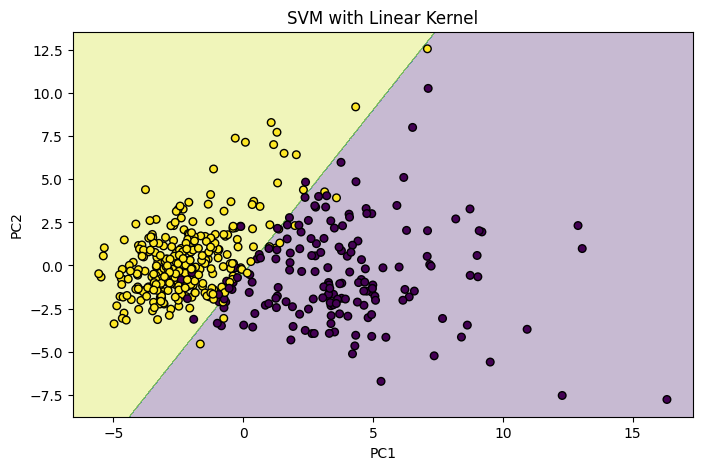

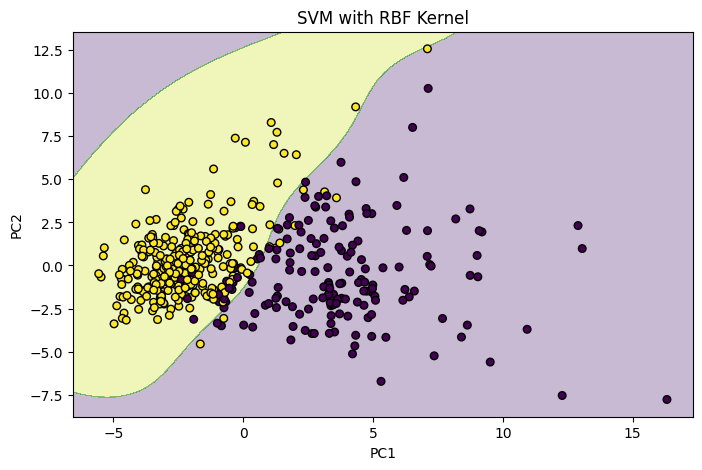

📊 Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

📊 Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

✅ Best Parameters from GridSearchCV:
{'C': 10, 'gamma': 0.01}
📈 Cross-Validation Accuracy (5-fold): 0.9789 ± 0.0070


In [1]:
# 📌 Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Load dataset (Breast Cancer)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
print(f"Feature Shape: {X.shape}, Target Shape: {y.shape}")

# ✅ Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ✅ Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_scaled)

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_2D, y, test_size=0.2, random_state=42)

# ✅ SVM with Linear Kernel
svc_linear = SVC(kernel='linear', C=1.0)
svc_linear.fit(X_train, y_train)

# ✅ SVM with RBF Kernel
svc_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svc_rbf.fit(X_train, y_train)

# 🔍 Helper function to plot decision boundary
def plot_svm_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# ✅ Visualize linear kernel SVM
plot_svm_decision_boundary(svc_linear, X_train, y_train, "SVM with Linear Kernel")

# ✅ Visualize RBF kernel SVM
plot_svm_decision_boundary(svc_rbf, X_train, y_train, "SVM with RBF Kernel")

# ✅ Evaluate performance
print("📊 Classification Report (Linear Kernel):")
print(classification_report(y_test, svc_linear.predict(X_test)))

print("📊 Classification Report (RBF Kernel):")
print(classification_report(y_test, svc_rbf.predict(X_test)))

# ✅ Hyperparameter Tuning using GridSearchCV (for RBF Kernel)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("✅ Best Parameters from GridSearchCV:")
print(grid_search.best_params_)

# ✅ Cross-validation accuracy
cv_scores = cross_val_score(SVC(kernel='rbf', **grid_search.best_params_), X_scaled, y, cv=5)
print(f"📈 Cross-Validation Accuracy (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
